## CNN for Regression - UTKface Dataset

### Download the Dataset

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1HROmgviy4jUUUaCdvvrQ8PcqtNg2jn3G?usp=sharing


Retrieving folder contents
Processing file 1mb5Z24TsnKI3ygNIlX6ZFiwUj0_PmpAW part1.tar.gz
Processing file 19vdaXVRtkP-nyxz1MYwXiFsh_m_OL72b part2.tar.gz
Processing file 1oj9ZWsLV2-k2idoW_nRSrLQLUP3hus3b part3.tar.gz
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1mb5Z24TsnKI3ygNIlX6ZFiwUj0_PmpAW
From (redirected): https://drive.google.com/uc?id=1mb5Z24TsnKI3ygNIlX6ZFiwUj0_PmpAW&confirm=t&uuid=7a84271c-8ede-423d-942f-333f0fe68665
To: /content/UTKface_inthewild/part1.tar.gz
100% 874M/874M [00:12<00:00, 68.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=19vdaXVRtkP-nyxz1MYwXiFsh_m_OL72b
From (redirected): https://drive.google.com/uc?id=19vdaXVRtkP-nyxz1MYwXiFsh_m_OL72b&confirm=t&uuid=85f2962b-5cd2-495a-a37d-b1df8731a3e7
To: /content/UTKface_inthewild/part2.tar.gz
100% 459M/459M [00:07<00:00, 63.0MB/s]
Downloading...
From (original): https://drive.g

In [ ]:
!ls -lrth UTKface_inthewild

total 1.3G
-rw-r--r-- 1 root root 834M Sep 30  2021 part1.tar.gz
-rw-r--r-- 1 root root  55M Sep 30  2021 part3.tar.gz
-rw-r--r-- 1 root root 438M Sep 30  2021 part2.tar.gz


In [ ]:
# Extract part1.tar.gz
!tar -xzvf UTKface_inthewild/part1.tar.gz -C UTKface_inthewild/

# Extract part2.tar.gz
!tar -xzvf UTKface_inthewild/part2.tar.gz -C UTKface_inthewild/

# Extract part3.tar.gz
!tar -xzvf UTKface_inthewild/part3.tar.gz -C UTKface_inthewild/


In [ ]:
#!ls -lrth UTKface_inthewild/part1


In [ ]:
!ls -lrth UTKface_inthewild


total 1.3G
drwxr-xr-x 2 22294  143 520K Jan 12  2017 part1
drwxr-xr-x 2 22294  143 528K Jan 18  2017 part2
drwxr-xr-x 2 22294  143 172K Jan 21  2017 part3
-rw-r--r-- 1 root  root 834M Sep 30  2021 part1.tar.gz
-rw-r--r-- 1 root  root  55M Sep 30  2021 part3.tar.gz
-rw-r--r-- 1 root  root 438M Sep 30  2021 part2.tar.gz


In [ ]:
# Move all .jpg files from subdirectories to UTKface_inthewild/
!find UTKface_inthewild/ -name '*.jpg' -exec mv {} UTKface_inthewild/ \;


In [ ]:
# Remove the .tar.gz files
!rm UTKface_inthewild/part1.tar.gz UTKface_inthewild/part2.tar.gz UTKface_inthewild/part3.tar.gz

# Remove the extracted directories (assuming they were extracted into directories named part1, part2, and part3)
!rm -r UTKface_inthewild/part1 UTKface_inthewild/part2 UTKface_inthewild/part3


In [ ]:
# List the remaining contents of UTKface_inthewild/
#!ls -lrth UTKface_inthewild/


In [ ]:
!ls

sample_data  utkface_dataset  UTKface_inthewild


In [ ]:
image_path = 'UTKface_inthewild/26_0_3_20170120134330671.jpg'

In [ ]:
img = Image.open(image_path)

In [ ]:
to_tensor = transforms.ToTensor()
img_tensor = to_tensor(img)


In [ ]:
print("Pixel values before normalization (sample 5x5 from the first channel):")
print(img_tensor[0, :5, :5].numpy())  # Print the first 5x5 pixels from the first channel (R)

print(f"Min pixel value: {torch.min(img_tensor)}")
print(f"Max pixel value: {torch.max(img_tensor)}")

Pixel values before normalization (sample 5x5 from the first channel):
[[0.76862746 0.77254903 0.76862746 0.7764706  0.78431374]
 [0.77254903 0.77254903 0.77254903 0.7764706  0.78431374]
 [0.77254903 0.7764706  0.77254903 0.78039217 0.7882353 ]
 [0.7764706  0.78039217 0.7764706  0.78431374 0.7882353 ]
 [0.78039217 0.78431374 0.78039217 0.7882353  0.7921569 ]]
Min pixel value: 0.0
Max pixel value: 1.0


### Set up Dataset and DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# Custom Dataset Class for UTKFace
class UTKFaceDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_filenames = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_path)

        # Debugging: Print the mode of the image
        #print(f"Loading image {img_path}, mode: {image.mode}")

        # Convert image to RGB if it is grayscale or has an alpha channel
        if image.mode != 'RGB':
            image = image.convert('RGB')
            print(f"Converted image to RGB mode")


        # Age is the first part of the filename
        age = int(self.image_filenames[idx].split('_')[0])

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(age, dtype=torch.float32)

In [ ]:
# Transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.ToTensor(),          # Convert images to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1] and image with pixel values contained in [0,1]
])

# Create dataset
image_dir = 'UTKface_inthewild/'  # Directory where your .jpg files are located
dataset = UTKFaceDataset(image_dir=image_dir, transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


### Verify Data Loading

In [ ]:
# Example: Iterate through DataLoader
for images, ages in dataloader:
    print(f'Image batch size: {images.size()}, Ages: {ages}')
    break  # Break after first batch for demonstration


Image batch size: torch.Size([32, 3, 128, 128]), Ages: tensor([26., 26., 28., 26.,  2., 21., 16., 27., 45., 32., 39., 15., 65., 26.,
        52.,  2., 55., 37., 26.,  1., 60.,  3., 26., 17., 45., 33., 55., 28.,
         8., 15., 26., 50.])


In [ ]:
x = torch.ones((32, 3, 128, 128))
x.shape

torch.Size([32, 3, 128, 128])

### Train your model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os

class CNNRegression(nn.Module):
    def __init__(self):
        super().__init__()  # This works just as well in Python 3
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 512),  # Correct the input size here
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Add dropout with a probability of 50%
            nn.Linear(512, 1),
            nn.ReLU() # Apply ReLU to the output layer to ensure non-negative prediction
        )

    def forward(self, x):
        return self.model(x)

# Example usage
model = CNNRegression()
x = torch.ones((32, 3, 128, 128))  # Batch size 32, 3 channels (RGB), 128x128 images
output = model(x)
print(f"{output.shape}\n\n")  # Should output shape [32, 1]



# Create the full dataset
image_dir = 'UTKface_inthewild/'  # Replace with your dataset directory
full_dataset = UTKFaceDataset(image_dir=image_dir, transform=transform)

train_size = int(0.7 * len(full_dataset))  # 70% for training
val_size = int(0.15 * len(full_dataset))   # 15% for validation
test_size = len(full_dataset) - train_size - val_size  # 15% for testing

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])


# Define DataLoaders for each dataset with a given batch size
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Example of using the DataLoader in a training loop
for images, ages in train_loader:
    print(f"images.shape: {images.shape}")  # Should be [batch_size, 3, 128, 128] for RGB images
    print(ages)  # Tensor of ages corresponding to the batch of images
    # Training code here...
    break  # Just to show the first batch; remove in actual training


torch.Size([32, 1])


images.shape: torch.Size([32, 3, 128, 128])
tensor([40., 43.,  1., 20., 50., 65.,  8., 26., 16., 61., 50., 68., 30., 26.,
        30., 35., 46.,  4., 32., 28., 35., 85., 53., 28.,  2., 66., 30., 16.,
         7., 22., 30., 24.])


In [ ]:
device = torch.device("cuda:0")
# device = torch.device("cpu")


In [ ]:

# Instantiate the model, loss function, and optimizer
model = CNNRegression()
model = model.to(device)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, ages in train_loader:
        images = images.to(device)
        ages = ages.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs.squeeze(), ages)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Zero the parameter gradients
        optimizer.zero_grad()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print('Training finished!')


Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Epoch [1/10], Loss: 382.6364
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Epoch [2/10], Loss: 334.8164
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Epoch [3/10], Loss

### Testing

Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode
Converted image to RGB mode


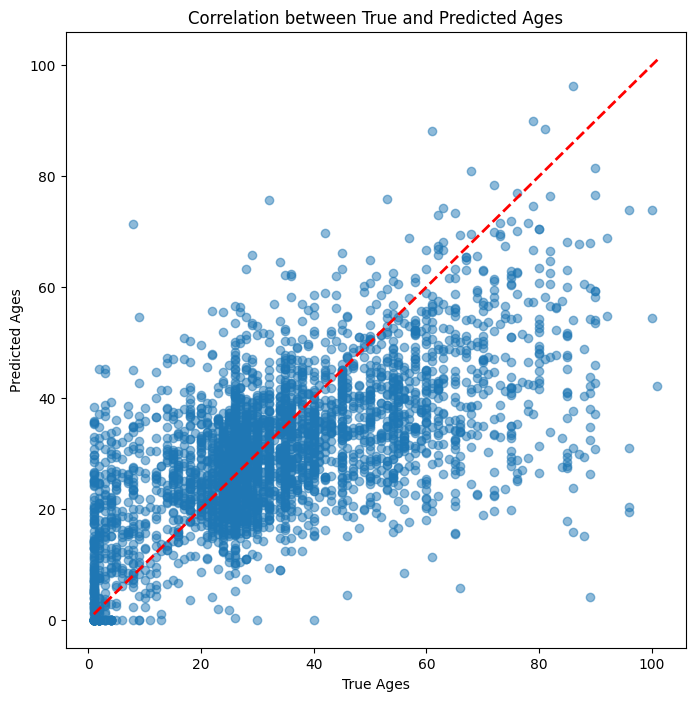

In [ ]:
import matplotlib.pyplot as plt

# Assuming `test_loader` is your DataLoader for the test dataset

# Collect true and predicted ages
true_ages = []
predicted_ages = []

# Put the model in evaluation mode
model.eval()

# Turn off gradient computation for testing
with torch.no_grad():
    for images, ages in test_loader:
        images = images.to(device)
        ages = ages.to(device)

        # Get predictions from the model
        outputs = model(images).squeeze()  # Assuming the model returns a single value for regression

        # Collect the true and predicted ages
        true_ages.extend(ages.cpu().numpy())
        # Convert the outputs tensor to a 1D numpy array
        predicted_ages.extend(outputs.cpu().numpy().flatten())

# Plot the correlation between true and predicted ages
plt.figure(figsize=(8, 8))
plt.scatter(true_ages, predicted_ages, alpha=0.5)
plt.plot([min(true_ages), max(true_ages)], [min(true_ages), max(true_ages)], 'r--', lw=2)  # y=x line
plt.xlabel('True Ages')
plt.ylabel('Predicted Ages')
plt.title('Correlation between True and Predicted Ages')
plt.show()


### Displaying images with True and Predicted Ages

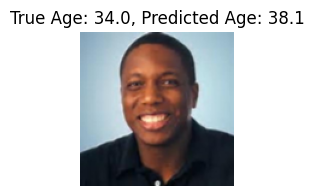

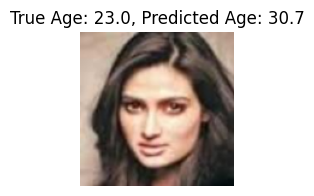

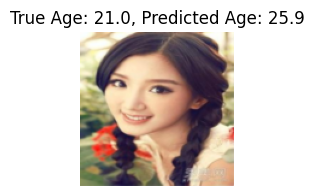

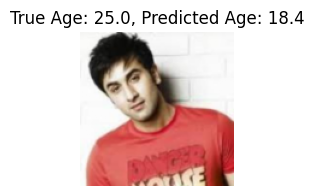

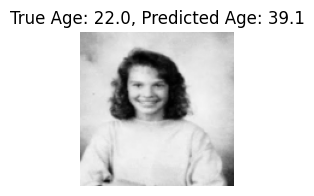

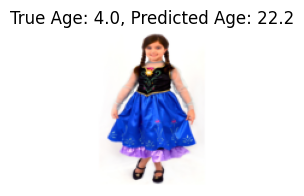

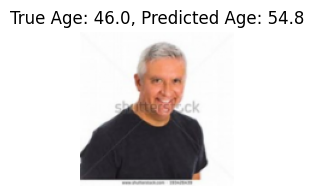

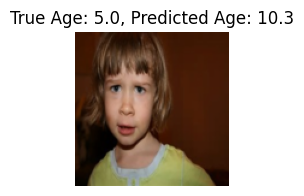

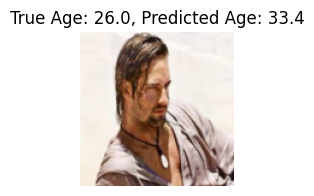

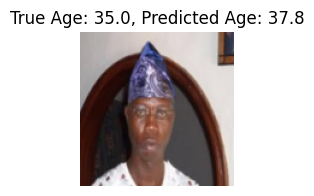

In [ ]:
import matplotlib.pyplot as plt

# Display 10 images with their true and predicted ages
def show_predictions(model, test_loader, device):
    model.eval()
    images_shown = 0

    # Turn off gradients for validation
    with torch.no_grad():
        for images, ages in test_loader:
            images = images.to(device)
            ages = ages.to(device)

            # Get model predictions
            outputs = model(images).squeeze()  # Predicted ages

            # Display first 10 images with true and predicted ages
            for i in range(min(10, images.size(0))):  # Show up to 10 images
                plt.figure(figsize=(2, 2))
                img = images[i].cpu().numpy().transpose(1, 2, 0)  # Convert to HWC format for plotting
                img = (img * 0.5) + 0.5  # Denormalize the image to [0, 1] range

                # Plot the image
                plt.imshow(img)
                plt.title(f'True Age: {ages[i].item():.1f}, Predicted Age: {outputs[i].item():.1f}')
                plt.axis('off')

                images_shown += 1
                if images_shown == 10:
                    return  # Stop after showing 10 images

# Call the function to show the predictions
show_predictions(model, test_loader, device)
